In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from robot_tools import *
import math

In [2]:
# Tut 1.9.2
Rotation(pi/3, 'x', rad = True)

# R = Rotation_BA(60, 0, 0, rad = False)
# np.shape(R) == (3,3)

Matrix([
[1,         0,          0],
[0,       1/2, -sqrt(3)/2],
[0, sqrt(3)/2,        1/2]])

In [32]:
# Tut 1.9.3

# Rotation matrix
R = Rotation(pi/6, 'y', rad = True)
T1 = R.col_insert(3, Matrix([0, 0, 0]))
T1 = T1.row_insert(3, Matrix([0, 0, 0, 1]).T)

T2 = Matrix([[1, 0, 0, 2],
            [0, 1, 0, 4],
            [0, 0, 1, 3],
            [0, 0, 0, 1]])

T = T2 * T1

# coordinate = Matrix([2, 4, 1])

# Mapping(T, coordinate)
T

Matrix([
[sqrt(3)/2, 0,       1/2, 2],
[        0, 1,         0, 4],
[     -1/2, 0, sqrt(3)/2, 3],
[        0, 0,         0, 1]])

In [26]:
T1

Matrix([
[sqrt(3)/2, 0,       1/2, 0],
[        0, 1,         0, 0],
[     -1/2, 0, sqrt(3)/2, 0],
[        0, 0,         0, 1]])

In [30]:
R = Rotation(symbols('a'), 'y', rad = True)
R

Matrix([
[ cos(a), 0, sin(a)],
[      0, 1,      0],
[-sin(a), 0, cos(a)]])

In [27]:
T2

Matrix([
[1, 0, 0, 2],
[0, 1, 0, 4],
[0, 0, 1, 3],
[0, 0, 0, 1]])

In [6]:
# Tut 1.9.4
R = np.array([np.sqrt(2)/2, -0.5, -0.5, 
              0.5, np.sqrt(2)/4 + 0.5, np.sqrt(2)/4 - 0.5,
              0.5, np.sqrt(2)/4 - 0.5, np.sqrt(2)/4 + 0.5]).reshape(3,3)
print(R)

# Cos is an even function!!
Get_angle_from_rotation(R)

[[ 0.70710678 -0.5        -0.5       ]
 [ 0.5         0.85355339 -0.14644661]
 [ 0.5        -0.14644661  0.85355339]]
Alpha 1 is 0.7853981633974484 rad, 45.00000000000001 degrees
Rotation axis 1 is [ 0.         -0.70710678  0.70710678]
Check the summed square: 1.0
Euler parameter 1 is [0.0, -0.2705980500730985, 0.2705980500730985, 0.9238795325112867]
-----------------------------
Alpha 2 is -0.7853981633974484 rad, -45.00000000000001 degrees
Rotation axis 2 is [-0.          0.70710678 -0.70710678]
Check the summed square: 1.0
Euler parameter 2 is [0.0, -0.2705980500730985, 0.2705980500730985, 0.9238795325112867]


([0.7853981633974484,
  array([ 0.        , -0.70710678,  0.70710678]),
  [0.0, -0.2705980500730985, 0.2705980500730985, 0.9238795325112867]],
 [-0.7853981633974484,
  array([-0.        ,  0.70710678, -0.70710678]),
  [0.0, -0.2705980500730985, 0.2705980500730985, 0.9238795325112867]])

In [36]:
# Tut 1.9.5
direction = Matrix([0, 1/np.sqrt(2), -1/np.sqrt(2)])

Rotation_non_pincipal_axes(-45, direction, rad = False)

Matrix([
[0.707106781186548,               -0.5,               -0.5],
[              0.5,  0.853553390593274, -0.146446609406726],
[              0.5, -0.146446609406726,  0.853553390593274]])

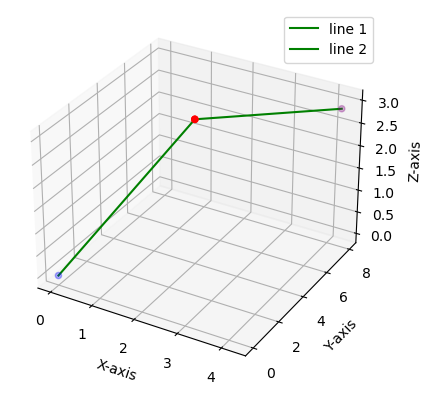

In [8]:
# Tut 1.9.6-7

# create the figure and axes objects
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# define the coordinates of the two points
x = np.array([0, 2])
y = np.array([0, 4])
z = np.array([0, 3])

x1 = np.array([2, 4.23])
y1 = np.array([4, 8])
z1 = np.array([3, 2.87])
# plot the two points
ax.scatter(x, y, z, color=['blue', 'red'])
ax.scatter(x1, y1, z1, color=['red', 'purple'])

# plot the line between the two points
ax.plot(x, y, z, color='green', label='line 1')
ax.plot(x1, y1, z1, color='green', label='line 2')

# set the labels for the axes and the legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.legend()

# show the plot
plt.show()

### Tut 2.6.1

In [9]:
t = symbols('t')
theta1 = Function(r"\theta_1")(t)
theta1_dot = diff(theta1, t)
theta1_ddot = diff(theta1, t, t)

theta2 = Function(r"\theta_2")(t)
theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2, t, t)

d3 = Function(r"d_3")(t)
d3_dot = diff(d3, t)
d3_ddot = diff(d3, t, t)

L1 = symbols('L1')
L2 = symbols('L2')

alias = {}

# display as theta dot instead of d(theta)/dt, and ignore dependency (t)
alias.update({theta1: symbols(r"\theta_1"),
              theta1_dot: symbols(r"\dot{\theta_1}"),
              theta1_ddot: symbols(r"\ddot{\theta_1}"),
              theta2: symbols(r"\theta_2"),
              theta2_dot: symbols(r"\dot{\theta_2}"),
              theta2_ddot: symbols(r"\ddot{\theta_2}"),
              d3: symbols(r"d_3"),
              d3_dot: symbols(r"\dot{d_3}"),
              d3_ddot: symbols(r"\ddot{d_3}")
             })

In [10]:
# Tut 2.6.1

DH1 = [0, 0, symbols('L1'), theta1]
T01 = Tlink(DH1)
symprint('T',0, 1)
display(T01)

DH2 = [symbols('L2'), 0, 0, theta2]
T12 = Tlink(DH2)
symprint('T',1, 2)
display(T12)

DH3 = [symbols('L3'), 0, d3, 0]
T23 = Tlink(DH3)
symprint('T',2, 3)
display(T23)

symprint('T',0, 3)
T03 = simplify(T01*T12*T23)
display(T03)

display('The position of the end effector')
display(Position_finder(T03))

^0T_1

Matrix([
[cos(\theta_1(t)), -sin(\theta_1(t)), 0,  0],
[sin(\theta_1(t)),  cos(\theta_1(t)), 0,  0],
[               0,                 0, 1, L1],
[               0,                 0, 0,  1]])

^1T_2

Matrix([
[cos(\theta_2(t)), -sin(\theta_2(t)), 0, L2],
[sin(\theta_2(t)),  cos(\theta_2(t)), 0,  0],
[               0,                 0, 1,  0],
[               0,                 0, 0,  1]])

^2T_3

Matrix([
[1, 0, 0,     L3],
[0, 1, 0,      0],
[0, 0, 1, d_3(t)],
[0, 0, 0,      1]])

^0T_3

Matrix([
[cos(\theta_1(t) + \theta_2(t)), -sin(\theta_1(t) + \theta_2(t)), 0, L2*cos(\theta_1(t)) + L3*cos(\theta_1(t) + \theta_2(t))],
[sin(\theta_1(t) + \theta_2(t)),  cos(\theta_1(t) + \theta_2(t)), 0, L2*sin(\theta_1(t)) + L3*sin(\theta_1(t) + \theta_2(t))],
[                             0,                               0, 1,                                             L1 + d_3(t)],
[                             0,                               0, 0,                                                       1]])

'The position of the end effector'

Matrix([
[L2*cos(\theta_1(t)) + L3*cos(\theta_1(t) + \theta_2(t))],
[L2*sin(\theta_1(t)) + L3*sin(\theta_1(t) + \theta_2(t))],
[                                            L1 + d_3(t)]])

In [11]:
# 4.6.1
 
omega = Matrix([0, 0, 0])
v = Matrix([0, 0, 0])

omega_11, v_11 = revolute_joint(frame = 1, 
                                theta_dot = theta1_dot, 
                                transform_low_high = T01, 
                                omega = omega, 
                                v = v, 
                               alias = alias)

omega_22, v_22 = revolute_joint(frame = 2, 
                                theta_dot = theta2_dot, 
                                transform_low_high = T12, 
                                omega = omega_11, 
                                v = v_11, 
                               alias = alias)

omega_33, v_33 = prismatic_joint(frame = 3, 
                                 d_dot = d3_dot, 
                                 transform_low_high = T23, 
                                 omega = omega_22, 
                                 v = v_22,
                                alias = alias)

Jee, J0 = Jacobian(parameters = [theta1_dot, theta2_dot, d3_dot], 
                   v_ee = v_33, 
                   omega_ee = omega_33, 
                   transform_low_high = T03,
                  alias = alias)


^1\Omega_1

Matrix([
[             0],
[             0],
[\dot{\theta_1}]])

^1V_1

Matrix([
[0],
[0],
[0]])

^2\Omega_2

Matrix([
[                              0],
[                              0],
[\dot{\theta_1} + \dot{\theta_2}]])

^2V_2

Matrix([
[L2*\dot{\theta_1}*sin(\theta_2)],
[L2*\dot{\theta_1}*cos(\theta_2)],
[                              0]])

^3\Omega_3

Matrix([
[                              0],
[                              0],
[\dot{\theta_1} + \dot{\theta_2}]])

^3V_3

Matrix([
[                                       L2*\dot{\theta_1}*sin(\theta_2)],
[L2*\dot{\theta_1}*cos(\theta_2) + L3*(\dot{\theta_1} + \dot{\theta_2})],
[                                                             \dot{d_3}]])

^eJ_e

Matrix([
[     L2*sin(\theta_2),  0, 0],
[L2*cos(\theta_2) + L3, L3, 0],
[                    0,  0, 1],
[                    0,  0, 0],
[                    0,  0, 0],
[                    1,  1, 0]])

^0J_

Matrix([
[-L2*sin(\theta_1) - L3*sin(\theta_1 + \theta_2), -L3*sin(\theta_1 + \theta_2), 0],
[ L2*cos(\theta_1) + L3*cos(\theta_1 + \theta_2),  L3*cos(\theta_1 + \theta_2), 0],
[                                              0,                            0, 1],
[                                              0,                            0, 0],
[                                              0,                            0, 0],
[                                              1,                            1, 0]])

### Tut 2.6.2

In [37]:
t = symbols('t')
theta1 = Function(r"\theta_1")(t)
theta1_dot = diff(theta1, t)
theta1_ddot = diff(theta1, t, t)

theta2 = Function(r"\theta_2")(t)
theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2, t, t)

theta3 = Function(r"\theta_3")(t)
theta3_dot = diff(theta3, t)
theta3_ddot = diff(theta3, t, t)

thetae = Function(r"\theta_e")(t)
thetae_dot = diff(thetae, t)
thetae_ddot = diff(thetae, t, t)


L1 = symbols('L1')
L2 = symbols('L2')

alias = {}

# display as theta dot instead of d(theta)/dt, and ignore dependency (t)
alias.update({theta1: symbols(r"\theta_1"),
              theta1_dot: symbols(r"\dot{\theta_1}"),
              theta1_ddot: symbols(r"\ddot{\theta_1}"),
              theta2: symbols(r"\theta_2"),
              theta2_dot: symbols(r"\dot{\theta_2}"),
              theta2_ddot: symbols(r"\ddot{\theta_2}"),
              theta3: symbols(r"\theta_3"),
              theta3_dot: symbols(r"\dot{\theta_3}"),
              theta3_ddot: symbols(r"\ddot{\theta_3}"),
              thetae: symbols(r"\theta_e"),
              thetae_dot: symbols(r"\dot{\theta_e}"),
              thetae_ddot: symbols(r"\ddot{\theta_e}")
             })

In [38]:
# Tut 2.6.2

DH1 = [0, 0, symbols('L1'), theta1]
T01 = Tlink(DH1)
symprint('T',0, 1)
display(T01)

DH2 = [0, pi/2, 0, theta2]
T12 = Tlink(DH2)
symprint('T',1, 2)
display(T12)

DH3 = [symbols('L2'), 0, 0, theta3]
T23 = Tlink(DH3)
symprint('T',2, 3)
display(T23)

DH4 = [symbols('L3'), 0, 0, 0]
T3E = Tlink(DH4)
symprint('T',3,'E')
display(T3E)

T0E = simplify(T01*T12*T23*T3E)
symprint('T',0, 'E')
display(T0E)

display('The position of the end effector')
display(Position_finder(simplify(T01*T12*T23*T3E)))


^0T_1

Matrix([
[cos(\theta_1(t)), -sin(\theta_1(t)), 0,  0],
[sin(\theta_1(t)),  cos(\theta_1(t)), 0,  0],
[               0,                 0, 1, L1],
[               0,                 0, 0,  1]])

^1T_2

Matrix([
[cos(\theta_2(t)), -sin(\theta_2(t)),  0, 0],
[               0,                 0, -1, 0],
[sin(\theta_2(t)),  cos(\theta_2(t)),  0, 0],
[               0,                 0,  0, 1]])

^2T_3

Matrix([
[cos(\theta_3(t)), -sin(\theta_3(t)), 0, L2],
[sin(\theta_3(t)),  cos(\theta_3(t)), 0,  0],
[               0,                 0, 1,  0],
[               0,                 0, 0,  1]])

^3T_E

Matrix([
[1, 0, 0, L3],
[0, 1, 0,  0],
[0, 0, 1,  0],
[0, 0, 0,  1]])

^0T_E

Matrix([
[cos(\theta_2(t) + \theta_3(t))*cos(\theta_1(t)), -sin(\theta_2(t) + \theta_3(t))*cos(\theta_1(t)),  sin(\theta_1(t)), (L2*cos(\theta_2(t)) + L3*cos(\theta_2(t) + \theta_3(t)))*cos(\theta_1(t))],
[sin(\theta_1(t))*cos(\theta_2(t) + \theta_3(t)), -sin(\theta_2(t) + \theta_3(t))*sin(\theta_1(t)), -cos(\theta_1(t)), (L2*cos(\theta_2(t)) + L3*cos(\theta_2(t) + \theta_3(t)))*sin(\theta_1(t))],
[                 sin(\theta_2(t) + \theta_3(t)),                   cos(\theta_2(t) + \theta_3(t)),                 0,               L1 + L2*sin(\theta_2(t)) + L3*sin(\theta_2(t) + \theta_3(t))],
[                                              0,                                                0,                 0,                                                                          1]])

'The position of the end effector'

Matrix([
[(L2*cos(\theta_2(t)) + L3*cos(\theta_2(t) + \theta_3(t)))*cos(\theta_1(t))],
[(L2*cos(\theta_2(t)) + L3*cos(\theta_2(t) + \theta_3(t)))*sin(\theta_1(t))],
[              L1 + L2*sin(\theta_2(t)) + L3*sin(\theta_2(t) + \theta_3(t))]])

In [39]:
# 4.6.2
 
omega = Matrix([0, 0, 0])
v = Matrix([0, 0, 0])

omega_11, v_11 = revolute_joint(frame = 1, 
                                theta_dot = theta1_dot, 
                                transform_low_high = T01, 
                                omega = omega, v = v,
                               alias = alias)
omega_22, v_22 = revolute_joint(frame = 2, 
                                theta_dot = theta2_dot, 
                                transform_low_high = T12, 
                                omega = omega_11, v = v_11,
                               alias = alias)
omega_33, v_33 = revolute_joint(frame = 3, 
                                theta_dot = theta3_dot, 
                                transform_low_high = T23, 
                                omega = omega_22, v = v_22,
                               alias = alias)

# For the end effector
omega_ee, v_ee = revolute_joint(frame = 'e', 
                                theta_dot = thetae_dot, 
                                transform_low_high = T3E, 
                                omega = omega_33, v = v_33,
                               alias = alias)

# This will work as well
# omega_ee, v_ee = prismatic_joint(frame = 'e', transform_low_high = T3E, omega = omega_33, v = v_33)

Jee, J0 = Jacobian(parameters = [theta1_dot, theta2_dot, theta3_dot], 
                   v_ee = v_ee, omega_ee = omega_ee, 
                   transform_low_high = T0E, Display_all_details = True, alias = alias)


^1\Omega_1

Matrix([
[             0],
[             0],
[\dot{\theta_1}]])

^1V_1

Matrix([
[0],
[0],
[0]])

^2\Omega_2

Matrix([
[\dot{\theta_1}*sin(\theta_2)],
[\dot{\theta_1}*cos(\theta_2)],
[              \dot{\theta_2}]])

^2V_2

Matrix([
[0],
[0],
[0]])

^3\Omega_3

Matrix([
[\dot{\theta_1}*sin(\theta_2 + \theta_3)],
[\dot{\theta_1}*cos(\theta_2 + \theta_3)],
[        \dot{\theta_2} + \dot{\theta_3}]])

^3V_3

Matrix([
[ L2*\dot{\theta_2}*sin(\theta_3)],
[ L2*\dot{\theta_2}*cos(\theta_3)],
[-L2*\dot{\theta_1}*cos(\theta_2)]])

^e\Omega_e

Matrix([
[\dot{\theta_1}*sin(\theta_2 + \theta_3)],
[\dot{\theta_1}*cos(\theta_2 + \theta_3)],
[        \dot{\theta_2} + \dot{\theta_3}]])

^eV_e

Matrix([
[                                       L2*\dot{\theta_2}*sin(\theta_3)],
[L2*\dot{\theta_2}*cos(\theta_3) + L3*(\dot{\theta_2} + \dot{\theta_3})],
[      -\dot{\theta_1}*(L2*cos(\theta_2) + L3*cos(\theta_2 + \theta_3))]])

Matrix([
[cos(\theta_1)*cos(\theta_2 + \theta_3), -sin(\theta_2 + \theta_3)*cos(\theta_1),  sin(\theta_1),                                      0,                                       0,              0],
[sin(\theta_1)*cos(\theta_2 + \theta_3), -sin(\theta_1)*sin(\theta_2 + \theta_3), -cos(\theta_1),                                      0,                                       0,              0],
[              sin(\theta_2 + \theta_3),                cos(\theta_2 + \theta_3),              0,                                      0,                                       0,              0],
[                                     0,                                       0,              0, cos(\theta_1)*cos(\theta_2 + \theta_3), -sin(\theta_2 + \theta_3)*cos(\theta_1),  sin(\theta_1)],
[                                     0,                                       0,              0, sin(\theta_1)*cos(\theta_2 + \theta_3), -sin(\theta_1)*sin(\theta_2 + \theta_3), -cos(\theta_1)],
[          

^eJ_e

Matrix([
[                                              0,      L2*sin(\theta_3),  0],
[                                              0, L2*cos(\theta_3) + L3, L3],
[-L2*cos(\theta_2) - L3*cos(\theta_2 + \theta_3),                     0,  0],
[                       sin(\theta_2 + \theta_3),                     0,  0],
[                       cos(\theta_2 + \theta_3),                     0,  0],
[                                              0,                     1,  1]])

^0J_

Matrix([
[-(L2*cos(\theta_2) + L3*cos(\theta_2 + \theta_3))*sin(\theta_1), -(L2*sin(\theta_2) + L3*sin(\theta_2 + \theta_3))*cos(\theta_1), -L3*sin(\theta_2 + \theta_3)*cos(\theta_1)],
[ (L2*cos(\theta_2) + L3*cos(\theta_2 + \theta_3))*cos(\theta_1), -(L2*sin(\theta_2) + L3*sin(\theta_2 + \theta_3))*sin(\theta_1), -L3*sin(\theta_1)*sin(\theta_2 + \theta_3)],
[                                                              0,                  L2*cos(\theta_2) + L3*cos(\theta_2 + \theta_3),                L3*cos(\theta_2 + \theta_3)],
[                                                              0,                                                   sin(\theta_1),                              sin(\theta_1)],
[                                                              0,                                                  -cos(\theta_1),                             -cos(\theta_1)],
[                                                              1,                                              

### Tut 2.6.3

In [15]:
t = symbols('t')
d1 = Function(r"d_1")(t)
d1_dot = diff(d1, t)
d1_ddot = diff(d1, t, t)

theta2 = Function(r"\theta_2")(t)
theta2_dot = diff(theta2, t)
theta2_ddot = diff(theta2, t, t)

theta3 = Function(r"\theta_3")(t)
theta3_dot = diff(theta3, t)
theta3_ddot = diff(theta3, t, t)

thetae = Function(r"\theta_e")(t)
thetae_dot = diff(thetae, t)
thetae_ddot = diff(thetae, t, t)


L1 = symbols('L1')
L2 = symbols('L2')

alias = {}

# display as theta dot instead of d(theta)/dt, and ignore dependency (t)
alias.update({d1: symbols(r"d_1"),
              d1_dot: symbols(r"\dot{d_1}"),
              d1_ddot: symbols(r"\ddot{d_1}"),
              theta2: symbols(r"\theta_2"),
              theta2_dot: symbols(r"\dot{\theta_2}"),
              theta2_ddot: symbols(r"\ddot{\theta_2}"),
              theta3: symbols(r"\theta_3"),
              theta3_dot: symbols(r"\dot{\theta_3}"),
              theta3_ddot: symbols(r"\ddot{\theta_3}"),
              thetae: symbols(r"\theta_e"),
              thetae_dot: symbols(r"\dot{\theta_e}"),
              thetae_ddot: symbols(r"\ddot{\theta_e}")
             })

In [16]:
# Tut 2.6.3

DH1 = [0, 0, d1 + symbols('L0'), 0]
T01 = Tlink(DH1)
symprint('T',0, 1)
display(T01)

DH2 = [symbols('L1'), 0, 0, theta2]
T12 = Tlink(DH2)
symprint('T',1, 2)
display(T12)

DH3 = [symbols('L2'), 0, 0, theta3]
T23 = Tlink(DH3)
symprint('T',2, 3)
display(T23)

DHE = [symbols('L3'), 0, 0, 0]
T3E = Tlink(DHE)
symprint('T',3, 'E')
display(T3E)

symprint('T',0, 'E')
T0E = T01*T12*T23*T3E 
display(simplify(T0E))

display('The position of the end effector')
display(Position_finder(simplify(T01*T12*T23*T3E)))


^0T_1

Matrix([
[1, 0, 0,           0],
[0, 1, 0,           0],
[0, 0, 1, L0 + d_1(t)],
[0, 0, 0,           1]])

^1T_2

Matrix([
[cos(\theta_2(t)), -sin(\theta_2(t)), 0, L1],
[sin(\theta_2(t)),  cos(\theta_2(t)), 0,  0],
[               0,                 0, 1,  0],
[               0,                 0, 0,  1]])

^2T_3

Matrix([
[cos(\theta_3(t)), -sin(\theta_3(t)), 0, L2],
[sin(\theta_3(t)),  cos(\theta_3(t)), 0,  0],
[               0,                 0, 1,  0],
[               0,                 0, 0,  1]])

^3T_E

Matrix([
[1, 0, 0, L3],
[0, 1, 0,  0],
[0, 0, 1,  0],
[0, 0, 0,  1]])

^0T_E

Matrix([
[cos(\theta_2(t) + \theta_3(t)), -sin(\theta_2(t) + \theta_3(t)), 0, L1 + L2*cos(\theta_2(t)) + L3*cos(\theta_2(t) + \theta_3(t))],
[sin(\theta_2(t) + \theta_3(t)),  cos(\theta_2(t) + \theta_3(t)), 0,      L2*sin(\theta_2(t)) + L3*sin(\theta_2(t) + \theta_3(t))],
[                             0,                               0, 1,                                                  L0 + d_1(t)],
[                             0,                               0, 0,                                                            1]])

'The position of the end effector'

Matrix([
[L1 + L2*cos(\theta_2(t)) + L3*cos(\theta_2(t) + \theta_3(t))],
[     L2*sin(\theta_2(t)) + L3*sin(\theta_2(t) + \theta_3(t))],
[                                                 L0 + d_1(t)]])

In [17]:
# 4.6.3

omega = Matrix([0, 0, 0])
v = Matrix([0, 0, 0])

omega_11, v_11 = prismatic_joint(frame = 1, d_dot = d1_dot, 
                                 transform_low_high = T01, 
                                 omega = omega, v = v,
                                alias = alias)

omega_22, v_22 = revolute_joint(frame = 2, theta_dot = theta2_dot, 
                                transform_low_high = T12, 
                                omega = omega_11, v = v_11,
                               alias = alias)

omega_33, v_33 = revolute_joint(frame = 3, theta_dot = theta3_dot, 
                                transform_low_high = T23, 
                                omega = omega_22, v = v_22,
                               alias = alias)

# For the end effector
omega_ee, v_ee = revolute_joint(frame = 'e', theta_dot = thetae_dot, 
                                transform_low_high = T3E, 
                                omega = omega_33, v = v_33,
                               alias = alias)

# This will work as well
# omega_ee, v_ee = prismatic_joint(frame = 'e', transform_low_high = T3E, omega = omega_33, v = v_33)

Jee, J0 = Jacobian(parameters = [d1_dot, theta2_dot, theta3_dot], 
                   v_ee = v_ee, omega_ee = omega_ee, 
                   transform_low_high = T0E, 
                   Display_all_details = True,
                  alias = alias)

^1\Omega_1

Matrix([
[0],
[0],
[0]])

^1V_1

Matrix([
[        0],
[        0],
[\dot{d_1}]])

^2\Omega_2

Matrix([
[             0],
[             0],
[\dot{\theta_2}]])

^2V_2

Matrix([
[        0],
[        0],
[\dot{d_1}]])

^3\Omega_3

Matrix([
[                              0],
[                              0],
[\dot{\theta_2} + \dot{\theta_3}]])

^3V_3

Matrix([
[L2*\dot{\theta_2}*sin(\theta_3)],
[L2*\dot{\theta_2}*cos(\theta_3)],
[                      \dot{d_1}]])

^e\Omega_e

Matrix([
[                              0],
[                              0],
[\dot{\theta_2} + \dot{\theta_3}]])

^eV_e

Matrix([
[                                       L2*\dot{\theta_2}*sin(\theta_3)],
[L2*\dot{\theta_2}*cos(\theta_3) + L3*(\dot{\theta_2} + \dot{\theta_3})],
[                                                             \dot{d_1}]])

Matrix([
[cos(\theta_2 + \theta_3), -sin(\theta_2 + \theta_3), 0,                        0,                         0, 0],
[sin(\theta_2 + \theta_3),  cos(\theta_2 + \theta_3), 0,                        0,                         0, 0],
[                       0,                         0, 1,                        0,                         0, 0],
[                       0,                         0, 0, cos(\theta_2 + \theta_3), -sin(\theta_2 + \theta_3), 0],
[                       0,                         0, 0, sin(\theta_2 + \theta_3),  cos(\theta_2 + \theta_3), 0],
[                       0,                         0, 0,                        0,                         0, 1]])

^eJ_e

Matrix([
[0,      L2*sin(\theta_3),  0],
[0, L2*cos(\theta_3) + L3, L3],
[1,                     0,  0],
[0,                     0,  0],
[0,                     0,  0],
[0,                     1,  1]])

^0J_

Matrix([
[0, -L2*sin(\theta_2) - L3*sin(\theta_2 + \theta_3), -L3*sin(\theta_2 + \theta_3)],
[0,  L2*cos(\theta_2) + L3*cos(\theta_2 + \theta_3),  L3*cos(\theta_2 + \theta_3)],
[1,                                               0,                            0],
[0,                                               0,                            0],
[0,                                               0,                            0],
[0,                                               1,                            1]])

### 2.6.4

In [18]:
# Tut 2.6.4

DH1 = [0, 0, 0, symbols('theta1')]
T01 = Tlink(DH1)
symprint('T',0, 1)
display(T01)

DH2 = [symbols('L2'), 0, symbols('L1') + symbols('d2'), 0]
T12 = Tlink(DH2)
symprint('T',1, 2)
display(T12)

DH3 = [0, pi/2, symbols('L3') + symbols('d3'), 0]
T23 = Tlink(DH3)
symprint('T',2, 3)
display(T23)

T03 = simplify(T01*T12*T23)
symprint('T',0, '3')
display(T03)

display('The position of the end effector')
display(Position_finder(simplify(T01*T12*T23)))


^0T_1

Matrix([
[cos(theta1), -sin(theta1), 0, 0],
[sin(theta1),  cos(theta1), 0, 0],
[          0,            0, 1, 0],
[          0,            0, 0, 1]])

^1T_2

Matrix([
[1, 0, 0,      L2],
[0, 1, 0,       0],
[0, 0, 1, L1 + d2],
[0, 0, 0,       1]])

^2T_3

Matrix([
[1, 0,  0,        0],
[0, 0, -1, -L3 - d3],
[0, 1,  0,        0],
[0, 0,  0,        1]])

^0T_3

Matrix([
[cos(theta1), 0,  sin(theta1), L2*cos(theta1) + (L3 + d3)*sin(theta1)],
[sin(theta1), 0, -cos(theta1), L2*sin(theta1) - (L3 + d3)*cos(theta1)],
[          0, 1,            0,                                L1 + d2],
[          0, 0,            0,                                      1]])

'The position of the end effector'

Matrix([
[L2*cos(theta1) + (L3 + d3)*sin(theta1)],
[L2*sin(theta1) - (L3 + d3)*cos(theta1)],
[                               L1 + d2]])

In [19]:
# Tut 2.6.4 sample answer

DH1 = [0, 0, 0, symbols('theta1')]
T01 = Tlink(DH1)
symprint('T',0, 1)
display(T01)

DH2 = [0, 0, symbols('L1') + symbols('d2'), 0]
T12 = Tlink(DH2)
symprint('T',1, 2)
display(T12)

DH3 = [symbols('L2'), pi/2, symbols('L3') + symbols('d3'), 0]
T23 = Tlink(DH3)
symprint('T',2, 3)
display(T23)

symprint('T',0, '3')
T03 = simplify(T01*T12*T23)
display(T03)

display('The position of the end effector')
display(Position_finder(simplify(T01*T12*T23)))

^0T_1

Matrix([
[cos(theta1), -sin(theta1), 0, 0],
[sin(theta1),  cos(theta1), 0, 0],
[          0,            0, 1, 0],
[          0,            0, 0, 1]])

^1T_2

Matrix([
[1, 0, 0,       0],
[0, 1, 0,       0],
[0, 0, 1, L1 + d2],
[0, 0, 0,       1]])

^2T_3

Matrix([
[1, 0,  0,       L2],
[0, 0, -1, -L3 - d3],
[0, 1,  0,        0],
[0, 0,  0,        1]])

^0T_3

Matrix([
[cos(theta1), 0,  sin(theta1), L2*cos(theta1) + (L3 + d3)*sin(theta1)],
[sin(theta1), 0, -cos(theta1), L2*sin(theta1) - (L3 + d3)*cos(theta1)],
[          0, 1,            0,                                L1 + d2],
[          0, 0,            0,                                      1]])

'The position of the end effector'

Matrix([
[L2*cos(theta1) + (L3 + d3)*sin(theta1)],
[L2*sin(theta1) - (L3 + d3)*cos(theta1)],
[                               L1 + d2]])

In [20]:
# 4.6.4 (follow the sample solution in the previous questions)

omega = Matrix([0, 0, 0])
v = Matrix([0, 0, 0])


theta_1_dot = symbols('\dot{\\theta_1}')
d_2_dot = symbols('\dot{d_2}')
d_3_dot = symbols('\dot{d_3}')

omega_11, v_11 = revolute_joint(frame = 1, theta_dot = theta_1_dot, 
                                transform_low_high = T01, omega = omega, v = v, alias = alias)

omega_22, v_22 = prismatic_joint(frame = 2, d_dot = d_2_dot, 
                                 transform_low_high = T12, omega = omega_11, v = v_11, alias = alias)

omega_33, v_33 = prismatic_joint(frame = 3, d_dot = d_3_dot, 
                                 transform_low_high = T23, omega = omega_22, v = v_22, alias = alias)

Jee, J0 = Jacobian(parameters = [theta_1_dot, d_2_dot, d_3_dot], 
                   v_ee = v_33, omega_ee = omega_33, 
                   transform_low_high = T03, 
                   Display_all_details = True, alias = alias)


^1\Omega_1

Matrix([
[             0],
[             0],
[\dot{\theta_1}]])

^1V_1

Matrix([
[0],
[0],
[0]])

^2\Omega_2

Matrix([
[             0],
[             0],
[\dot{\theta_1}]])

^2V_2

Matrix([
[        0],
[        0],
[\dot{d_2}]])

^3\Omega_3

Matrix([
[             0],
[\dot{\theta_1}],
[             0]])

^3V_3

Matrix([
[      \dot{\theta_1}*(L3 + d3)],
[                     \dot{d_2}],
[-L2*\dot{\theta_1} + \dot{d_3}]])

Matrix([
[cos(theta1), 0,  sin(theta1),           0, 0,            0],
[sin(theta1), 0, -cos(theta1),           0, 0,            0],
[          0, 1,            0,           0, 0,            0],
[          0, 0,            0, cos(theta1), 0,  sin(theta1)],
[          0, 0,            0, sin(theta1), 0, -cos(theta1)],
[          0, 0,            0,           0, 1,            0]])

^eJ_e

Matrix([
[L3 + d3, 0, 0],
[      0, 1, 0],
[    -L2, 0, 1],
[      0, 0, 0],
[      1, 0, 0],
[      0, 0, 0]])

^0J_

Matrix([
[-L2*sin(theta1) + (L3 + d3)*cos(theta1), 0,  sin(theta1)],
[ L2*cos(theta1) + (L3 + d3)*sin(theta1), 0, -cos(theta1)],
[                                      0, 1,            0],
[                                      0, 0,            0],
[                                      0, 0,            0],
[                                      1, 0,            0]])

### Tut 2.6.5

In [21]:
# Tut 2.6.5 sample solution

DH1 = [0, 0, symbols('d1'), -pi/2]
T01 = Tlink(DH1)
symprint('T',0, 1)
display(T01)

DH2 = [0, -pi/2, symbols('d2'), pi/2]
T12 = Tlink(DH2)
symprint('T',1, 2)
display(T12)

DH3 = [0, pi/2, symbols('d3'), pi/2]
T23 = Tlink(DH3)
symprint('T',2, 3)
display(T23)

DHE = [symbols('Le'), 0, 0, 0]
T3E = Tlink(DHE)
symprint('T',3, 'E')
display(T3E)

T0E = T01*T12*T23*T3E
symprint('T',0, 'E')
display(simplify(T0E))

display('The position of the end effector')
display(Position_finder(simplify(T01*T12*T23*T3E)))

^0T_1

Matrix([
[ 0, 1, 0,  0],
[-1, 0, 0,  0],
[ 0, 0, 1, d1],
[ 0, 0, 0,  1]])

^1T_2

Matrix([
[ 0, -1, 0,  0],
[ 0,  0, 1, d2],
[-1,  0, 0,  0],
[ 0,  0, 0,  1]])

^2T_3

Matrix([
[0, -1,  0,   0],
[0,  0, -1, -d3],
[1,  0,  0,   0],
[0,  0,  0,   1]])

^3T_E

Matrix([
[1, 0, 0, Le],
[0, 1, 0,  0],
[0, 0, 1,  0],
[0, 0, 0,  1]])

^0T_E

Matrix([
[1, 0,  0, Le + d2],
[0, 0, -1,     -d3],
[0, 1,  0,      d1],
[0, 0,  0,       1]])

'The position of the end effector'

Matrix([
[Le + d2],
[    -d3],
[     d1]])

In [22]:
# 4.6.5 

omega = Matrix([0, 0, 0])
v = Matrix([0, 0, 0])


d_1_dot = symbols('\dot{d_1}')
d_2_dot = symbols('\dot{d_2}')
d_3_dot = symbols('\dot{d_3}')
d_e_dot = symbols('\dot{d_e}')


omega_11, v_11 = prismatic_joint(frame = 1, d_dot = d_1_dot, transform_low_high = T01, omega = omega, v = v, alias = alias)
omega_22, v_22 = prismatic_joint(frame = 2, d_dot = d_2_dot, transform_low_high = T12, omega = omega_11, v = v_11, alias = alias)
omega_33, v_33 = prismatic_joint(frame = 3, d_dot = d_3_dot, transform_low_high = T23, omega = omega_22, v = v_22, alias = alias)
omega_ee, v_ee = prismatic_joint(frame = 'e', d_dot = d_e_dot, transform_low_high = T3E, omega = omega_33, v = v_33, alias = alias)

Jee, J0 = Jacobian(parameters = [d_1_dot, d_2_dot, d_3_dot], 
                   v_ee = v_ee, omega_ee = omega_ee, 
                   transform_low_high = T0E, 
                   Display_all_details = True, alias = alias)

^1\Omega_1

Matrix([
[0],
[0],
[0]])

^1V_1

Matrix([
[        0],
[        0],
[\dot{d_1}]])

^2\Omega_2

Matrix([
[0],
[0],
[0]])

^2V_2

Matrix([
[-\dot{d_1}],
[         0],
[ \dot{d_2}]])

^3\Omega_3

Matrix([
[0],
[0],
[0]])

^3V_3

Matrix([
[\dot{d_2}],
[\dot{d_1}],
[\dot{d_3}]])

^e\Omega_e

Matrix([
[0],
[0],
[0]])

^eV_e

Matrix([
[\dot{d_2}],
[\dot{d_1}],
[\dot{d_3}]])

Matrix([
[1, 0,  0, 0, 0,  0],
[0, 0, -1, 0, 0,  0],
[0, 1,  0, 0, 0,  0],
[0, 0,  0, 1, 0,  0],
[0, 0,  0, 0, 0, -1],
[0, 0,  0, 0, 1,  0]])

^eJ_e

Matrix([
[0, 1, 0],
[1, 0, 0],
[0, 0, 1],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

^0J_

Matrix([
[0, 1,  0],
[0, 0, -1],
[1, 0,  0],
[0, 0,  0],
[0, 0,  0],
[0, 0,  0]])

## Backup script (Not very useful)

In [ ]:
# This method is quite messy
import plotly.graph_objs as go

# define the coordinates of the two points
x = [0, 2]
y = [0, 4]
z = [0, 3]

# create the trace for the points
trace_points = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        color=['blue', 'red'],
        size=10,
        symbol='circle'
    ),
    name='Point'
)

# create the trace for the line
trace_line = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='lines',
    line=dict(
        color='green',
        width=4
    ),
    name='Line'
)

# create the layout and add the legend
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='X-axis'),
        yaxis=dict(title='Y-axis'),
        zaxis=dict(title='Z-axis')
    ),
    legend=dict(
        x=0.05,
        y=0.95,
        bgcolor='white',
        bordercolor='gray',
        borderwidth=1
    )
)

# create the figure and add the traces and layout
fig = go.Figure(data=[trace_points, trace_line], layout=layout)

# show the plot
fig.show()

In [ ]:
# define the coordinates of the two points for the new line
x_new = [2, 4.23]
y_new = [4, 8]
z_new = [3, 2.87]

# create the trace for the points
trace_points = go.Scatter3d(
    x=x_new,
    y=y_new,
    z=z_new,
    mode='markers',
    marker=dict(
        color=['red', 'green'],
        size=10,
        symbol='circle'
    ),
    name='Point 2'
)

# create the trace for the new line
trace_new_line = go.Scatter3d(
    x=x_new,
    y=y_new,
    z=z_new,
    mode='lines',
    line=dict(
        color='purple',
        width=4
    ),
    name='New Line'
)

# add the new trace to the existing figure object
fig.add_trace(trace_new_line)

# show the plot with the new line added
fig.show()

In [ ]:
def symbol_name(name):
    import re
    name = 'T1'
    if len(re.findall('T', name))!=0:
        name = re.sub('T','theta', name)
        
    raw_str = rf'{name}'
    return raw_str



In [ ]:
symbols('alpha1')

In [ ]:
import re
name = 'T1'
if len(re.findall('T', name))!=0:
    re.sub('T','\theta_', name)

In [ ]:
a11, a12, a13, a21, a22, a23, a31, a32, a33 = symbols('a11 a12 a13 a21 a22 a23 a31 a32 a33')

# Define the matrix
A = Matrix([[cos(a11), a12, a13],
            [a21, a22, a23],
            [a31, a32, a33]])

A.subs(a11, pi)

In [ ]:
a11, a12, a13, a14, a21, a22, a23, a24, a31, a32, a33, a34, a41, a42, a43, a44 = symbols('a11, a12, a13, a14, a21, a22, a23, a24, a31, a32, a33, a34, a41, a42, a43, a44')
T = Matrix([[a11, a12, a13, a14],
            [a21, a22, a23, a24],
            [a31, a32, a33, a34],
            [a41, a42, a43, a44]])

T[0,0]